# Predicting Bike Rentals


In [1]:
import pandas as pd
bike_rentals = pd.read_csv('bike_sharing.csv')

In [2]:
bike_rentals.shape

(17379, 17)

In [3]:
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [4]:
bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
bike_rentals['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [6]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [7]:
bike_rentals['yr'].unique()

array([0, 1])

In [8]:
bike_rentals['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [9]:
len(bike_rentals['windspeed'].value_counts())

30

In [10]:
len(bike_rentals['windspeed'].unique())

30

In [11]:
bike_rentals.weathersit.unique()

array([1, 2, 3, 4])

Points to Note:

1. The seasons column is categorical with four unique values-1,2,3,4. The values indicate winter, spring, summer and fall respectively.
2. The columns spanning from <code>'season'</code> to <code>'weathersit'</code> are categorical. 
3. Categorical values for <code>'weathersit'</code> denote: 
    - Clear, Few clouds, Partly cloudy, Partly cloudy 
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


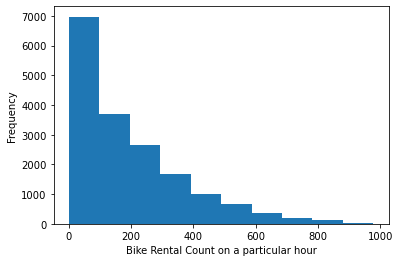

In [12]:
import matplotlib.pyplot as plt
plt.hist(bike_rentals['cnt'])
plt.xlabel('Bike Rental Count on a particular hour')
plt.ylabel('Frequency')
plt.show()

The histogram is right skewed indicating that for the most hour instances(approx 40%), there have been between 0 to 100 rentals. 


In [13]:
abs(bike_rentals.corr()['cnt']).sort_values()

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

<AxesSubplot:>

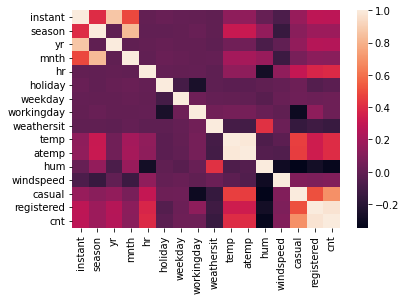

In [14]:
import seaborn as sns

sns.heatmap(bike_rentals.corr())

## Exploratory Data Analysis

We will discovering the trend in demand for bikes for different feature columns such as <code>season</code>, <code>workingday</code> etc.

Text(0, 0.5, 'Total rentals throughout the two years')

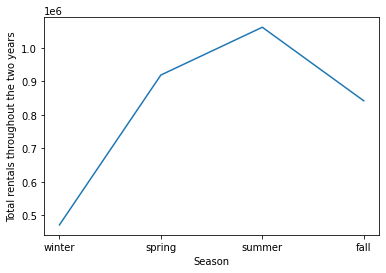

In [15]:
# performing some eda
# discovering the busiest seasons
def total_cnt(season):
    return bike_rentals[bike_rentals['season'] == season]['cnt'].sum()
    
season_cnt = [0,0,0,0]
for season in bike_rentals['season'].unique():
    season_cnt[season-1] = total_cnt(season)

seasons = ['winter','spring','summer','fall']
plt.plot(seasons,season_cnt)
plt.xlabel('Season')
plt.ylabel('Total rentals throughout the two years')

Text(0, 0.5, 'Total rentals throughout the two years')

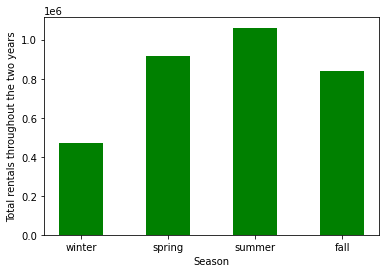

In [16]:
# this cell is an alternative to the one above with lesser steps and a bar plot
seasons = ['winter','spring','summer','fall']
season_count = bike_rentals.groupby('season').sum()['cnt']
plt.bar(seasons,season_count,color = 'green',width = 0.5)
plt.xlabel('Season')
plt.ylabel('Total rentals throughout the two years')

As we can infer from the graph above, the demand for the bicycle is the maximum during the summmer. Approximately about 33% of the total demand is during the summers.


In [17]:
# this is a function that returns the total count of a particular category of a categorical column
# I have shown the implementation of the function in the cells below 
# those implementations have been followed by a shorter pythonic approach.

def column_cnt(category,column):
    return bike_rentals[bike_rentals[column] == category]['cnt'].sum()

Text(0, 0.5, 'Bike Rental Count')

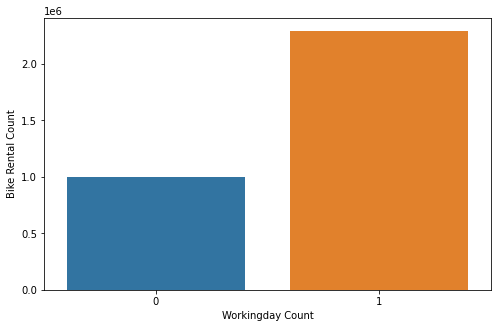

In [18]:
# weekdays vs holidays vs weekends
# 0 - weekend and holiday
# 1 - not 0

# this dictionary contains two keys: first one determinining the categoies and the second one, their corresponding bike renatls count
workingday_cnt = {'workingday':bike_rentals['workingday'].unique(),'day_count':[]}

for day in bike_rentals['workingday'].unique():
    workingday_cnt['day_count'].append(column_cnt(day,'workingday'))

plt.figure(figsize = (8,5))
sns.barplot(x='workingday',y='day_count',data = workingday_cnt)
plt.xlabel('Workingday Count')
plt.ylabel('Bike Rental Count')

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

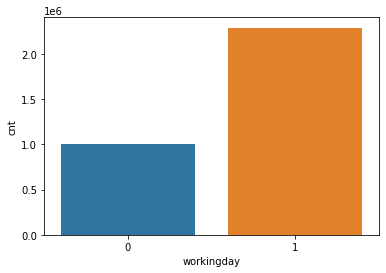

In [19]:
# # this cell is an alternative to the one above with lesser steps
index = [0,1]
holiday_cnt = bike_rentals.groupby('workingday').sum()['cnt']
sns.barplot(holiday_cnt.index,holiday_cnt)
#plt.xlabel('Workingday')

The demand for bikes is doubled on a working day as compared to a holiday or weekend.

(array(['Light', 'Strong', 'Harsh'], dtype=object),
 {'windspeed_category': array(['Light', 'Strong', 'Harsh'], dtype=object),
  'windspeed_cnt': [3102046, 189225, 1408]})

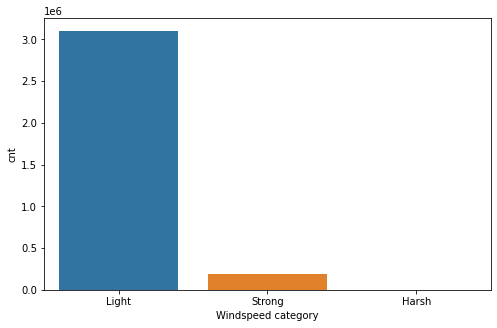

In [20]:
# categorising windspeed to get insight for diiferent conditions.
def categorise_windspeed(norm_speed):
    if norm_speed <0.4:
        return 'Light'
    if norm_speed >=0.4 and norm_speed<0.7:
        return 'Strong'
    return 'Harsh'

windspeeds = bike_rentals['windspeed'].apply(categorise_windspeed)
bike_rentals['windspeed_category'] = windspeeds
windspeeds_cnt = {'windspeed_category':windspeeds.unique(),'windspeed_cnt' :[]}
for speed in windspeeds.unique():
    windspeeds_cnt['windspeed_cnt'].append(column_cnt(speed,'windspeed_category'))

plt.figure(figsize=(8,5))
sns.barplot(x = 'windspeed_category',y = 'windspeed_cnt', data = windspeeds_cnt )
plt.xlabel('Windspeed category')
plt.ylabel('cnt')
windspeeds.unique(),windspeeds_cnt

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed_category', ylabel='cnt'>

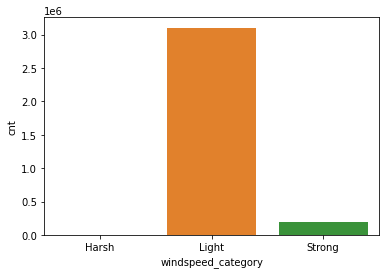

In [21]:
# this cell is an alternative to the one above with lesser steps
index = windspeeds.unique().tolist()
windspeed_cnt = bike_rentals.groupby('windspeed_category').sum()['cnt']
sns.barplot(windspeed_cnt.index,windspeed_cnt)

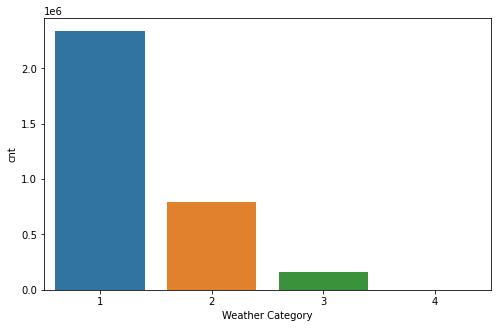

In [22]:
weather_cnt = {'weather_category':bike_rentals['weathersit'].unique(),'weather_cnt':[]}
for weather in bike_rentals['weathersit'].unique():
    weather_cnt['weather_cnt'].append(column_cnt(weather,'weathersit'))


plt.figure(figsize=(8,5))
sns.barplot(x = 'weather_category',y = 'weather_cnt', data = weather_cnt )
plt.xlabel('Weather Category')
plt.ylabel('cnt')
plt.show()

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

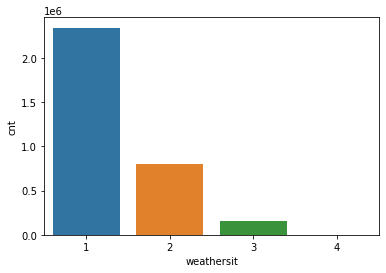

In [23]:
weather_cnt = bike_rentals.groupby('weathersit').sum()['cnt']
sns.barplot(weather_cnt.index,weather_cnt)

In [24]:
# comparing time taken for two different approaches.
import time as time

start = time.time()
w = bike_rentals[['weathersit','cnt']].groupby('weathersit').sum()['cnt']
end = time.time()
print(end-start)

start = time.time()
w = bike_rentals.groupby('weathersit').sum()['cnt']
end = time.time()
print(end-start)

0.0025479793548583984
0.0036001205444335938


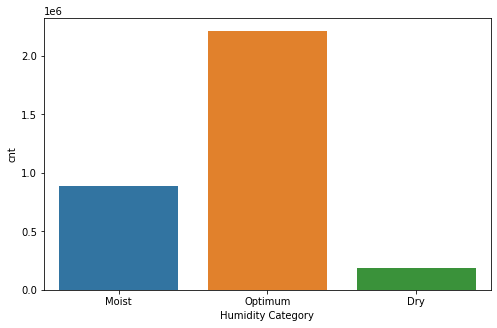

In [25]:
def categorise_humidity(hum):
    if hum <0.3:
        return 'Dry'
    if hum >=0.3 and hum<0.7:
        return 'Optimum'
    return 'Moist'

humidity = bike_rentals['hum'].apply(categorise_humidity)
bike_rentals['humidity_category'] = humidity
humidity_cnt = {'humidity_category':humidity.unique(),'humidity_cnt':[]}
for hum in humidity.unique():
    humidity_cnt['humidity_cnt'].append(column_cnt(hum,'humidity_category'))
plt.figure(figsize = (8,5))
sns.barplot(x = 'humidity_category',y = 'humidity_cnt',data = humidity_cnt)
plt.xlabel('Humidity Category')
plt.ylabel('cnt')
plt.show()

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


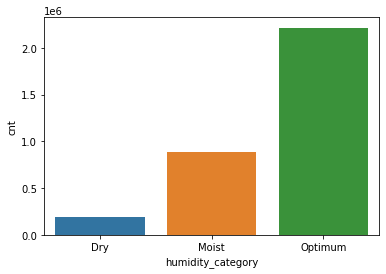

In [26]:
humidity_cnt = bike_rentals.groupby('humidity_category').sum()['cnt']
sns.barplot(humidity_cnt.index,humidity_cnt)
plt.show()

In [27]:
plt.figure(figsize=(200,100))
sns.barplot(x = 'hum',y = 'cnt',data = bike_rentals)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

Text(0, 0.5, 'count')

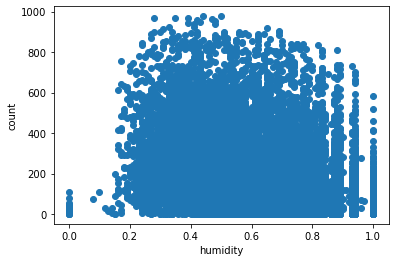

In [28]:
plt.scatter(bike_rentals['hum'],bike_rentals['cnt'])
plt.xlabel('humidity')
plt.ylabel('count')

As we can see from the scatter plot there is not much correlation that we can visually get an intuition about. We will need to use the <code>corr()</code> function to find it.

In [29]:
d = {'hum':bike_rentals['hum'].unique(),'hum_mean':[]}
for i in bike_rentals['hum'].unique():
    d['hum_mean'].append(bike_rentals[bike_rentals['hum'] == i]['cnt'].mean())

plt.figure(figsize = (200,100))
sns.barplot(x = 'hum',y = 'hum_mean',data = d)
plt.xticks(rotation = 90,fontsize = 100)
plt.show()

In [30]:
def assign_label(val):
    if val>=6 and val<12:
        return 1
    elif val >= 12 and val < 18:
        return 2
    elif val >= 18 and val <=24:
        return 3
    elif val>=0 and val<6:
        return 4


bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_label', ylabel='cnt'>

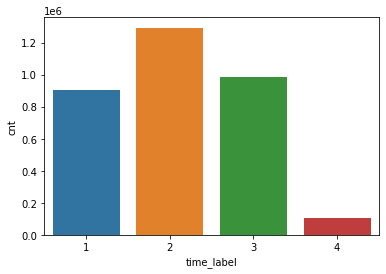

In [31]:
time_cnt = bike_rentals.groupby('time_label').sum()['cnt']
sns.barplot(time_cnt.index,time_cnt)

In [32]:
abs(bike_rentals.corr()['cnt']).sort_values()

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
time_label    0.378318
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## Model Selection and Training 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def model_feature_evaluation(feature_cols,target_col,df):
    X = df[feature_cols]
    y = df[target_col]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
    mse = mean_squared_error
    
    model_1 = LinearRegression()
    model_1.fit(X_train,y_train)
    predictions_1 = model_1.predict(X_test)
    print(model_1,'test error : ',mse(y_test,predictions_1),'train error : ',mse(y_train,model_1.predict(X_train)))
    
    model_2 = DecisionTreeRegressor()
    model_2.fit(X_train,y_train)
    predictions_2 = model_2.predict(X_test)
    mse = mean_squared_error
    print(model_2,'test error : ',mse(y_test,predictions_2),'train error : ',mse(y_train,model_2.predict(X_train)))
    
    model_3 = DecisionTreeRegressor(min_samples_leaf=5)
    model_3.fit(X_train,y_train)
    predictions_3 = model_3.predict(X_test)
    print(model_3,'test error : ',mse(y_test,predictions_3),'train error : ',mse(y_train,model_3.predict(X_train)))
    
    model_4 = RandomForestRegressor()
    model_4.fit(X_train,y_train)
    predictions_4 = model_4.predict(X_test)
    print(model_4,'test error : ',mse(y_test,predictions_4),'train error : ',mse(y_train,model_4.predict(X_train)))
    
    model_5  = RandomForestRegressor(min_samples_leaf=5)
    model_5.fit(X_train,y_train)
    predictions_5 = model_5.predict(X_test)
    print(model_5,'test error : ',mse(y_test,predictions_5),'train error : ',mse(y_train,model_5.predict(X_train)))

In [34]:
feature_columns_1 = bike_rentals.columns
X = bike_rentals[feature_columns_1]
X = X.drop(['casual','registered','cnt','instant','dteday'],axis = 1)
y = bike_rentals['cnt']

X = X.drop(['windspeed_category','humidity_category'],axis = 1)

We will be choosing set of feature columns one by one and will be evaluating how different models work on them. We will be using <code>DecisionTreeRegressor</code>, <code>RandomForestRegressor</code> and <code>LinearRegressor</code>

In [35]:
feature_columns_1 = X.columns
target_col = 'cnt'

feature_columns_1,model_feature_evaluation(feature_columns_1,target_col,bike_rentals)

LinearRegression() test error :  17943.960884127024 train error :  17282.71076472601
DecisionTreeRegressor() test error :  4049.635932105869 train error :  0.20933004521167284
DecisionTreeRegressor(min_samples_leaf=5) test error :  3508.7417965359205 train error :  1185.6176559085068
RandomForestRegressor() test error :  2177.1029555779364 train error :  256.9882251688661
RandomForestRegressor(min_samples_leaf=5) test error :  2454.380347490678 train error :  1156.0309312920372


(Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
       dtype='object'),
 None)

In [36]:
# how boolean indexing works
import numpy as np
arr = [True,False]

bike_rentals.columns[np.random.choice(arr,size = bike_rentals.shape[1])]

Index(['season', 'yr', 'hr', 'weekday', 'workingday', 'atemp', 'windspeed',
       'casual', 'humidity_category'],
      dtype='object')

In [37]:
feature_columns_2 = pd.Series(abs(bike_rentals.corr()['cnt']).sort_values() > 0.25)
feature_columns_2 = feature_columns_2[feature_columns_2 == True].index.to_list()

droppable = ['instant','atemp','casual','registered','cnt','hr']
for i in droppable:
    feature_columns_2.remove(i)

In [38]:
target_col = 'cnt'
model_feature_evaluation(feature_columns_2,target_col,bike_rentals)

LinearRegression() test error :  20444.206057309155 train error :  19545.78748732112
DecisionTreeRegressor() test error :  20136.23212841577 train error :  9087.384452984908
DecisionTreeRegressor(min_samples_leaf=5) test error :  17308.95087309797 train error :  11341.255749407412
RandomForestRegressor() test error :  18102.975795346465 train error :  9413.245922009342
RandomForestRegressor(min_samples_leaf=5) test error :  15899.059401858334 train error :  11550.746159515531


In [39]:
dummies_1 = pd.get_dummies(bike_rentals['weathersit'],prefix = 'weathersit')
dummies_2 = pd.get_dummies(bike_rentals['workingday'],prefix = 'workingday')
new_vectors = pd.concat([dummies_1,dummies_2],axis = 1)
bike_rentals = pd.concat([bike_rentals,new_vectors],axis = 1)

In [40]:
abs(bike_rentals.corr()['cnt']).sort_values()

weathersit_4    0.008340
weekday         0.026900
workingday_0    0.030284
workingday      0.030284
workingday_1    0.030284
holiday         0.030927
weathersit_2    0.046902
windspeed       0.093234
weathersit_1    0.117478
mnth            0.120638
weathersit_3    0.128034
weathersit      0.142426
season          0.178056
yr              0.250495
instant         0.278379
hum             0.322911
time_label      0.378318
hr              0.394071
atemp           0.400929
temp            0.404772
casual          0.694564
registered      0.972151
cnt             1.000000
Name: cnt, dtype: float64

In [41]:
droppable = ['cnt','registered','casual','atemp','hr','weathersit','workingday','weekday','holiday','instant','dteday', 'windspeed_category',
 'humidity_category']
feature_columns_3 = bike_rentals.columns.to_list()
for i in droppable:
    feature_columns_3.remove(i)

In [42]:
target_col = 'cnt'
model_feature_evaluation(feature_columns_3,target_col,bike_rentals)

LinearRegression() test error :  19899.45888424583 train error :  19129.71817730361
DecisionTreeRegressor() test error :  22676.626968844565 train error :  369.683441567338
DecisionTreeRegressor(min_samples_leaf=5) test error :  16035.440348446753 train error :  7357.896340309916
RandomForestRegressor() test error :  13306.714718252311 train error :  1985.0571450724053
RandomForestRegressor(min_samples_leaf=5) test error :  12694.833742365778 train error :  7211.415706676639


In [43]:
droppable = ['cnt','registered','casual','atemp','weathersit','workingday','instant','dteday', 'windspeed_category',
 'humidity_category']
feature_columns_4 = bike_rentals.columns.to_list()
for i in droppable:
    feature_columns_4.remove(i)

In [44]:
target_col = 'cnt'
model_feature_evaluation(feature_columns_4,target_col,bike_rentals)

LinearRegression() test error :  17960.821886169415 train error :  17255.689705307846
DecisionTreeRegressor() test error :  4040.0732163406215 train error :  0.20933004521167284
DecisionTreeRegressor(min_samples_leaf=5) test error :  3483.113438375057 train error :  1195.241373508439
RandomForestRegressor() test error :  2178.382585225243 train error :  257.3420555467339
RandomForestRegressor(min_samples_leaf=5) test error :  2479.2564579698847 train error :  1167.2983114115646


In [45]:
droppable = ['cnt','registered','casual','weathersit','workingday','instant','dteday', 'windspeed_category',
 'humidity_category']
feature_columns_5 = bike_rentals.columns.to_list()
for i in droppable:
    feature_columns_5.remove(i)

In [46]:
target_col = 'cnt'
model_feature_evaluation(feature_columns_5,target_col,bike_rentals)

LinearRegression() test error :  17914.8036618319 train error :  17235.087234123897
DecisionTreeRegressor() test error :  4250.308975834292 train error :  0.20933004521167284
DecisionTreeRegressor(min_samples_leaf=5) test error :  3510.8606625237094 train error :  1186.3779791752295
RandomForestRegressor() test error :  2175.0083627715767 train error :  254.13903355174176
RandomForestRegressor(min_samples_leaf=5) test error :  2426.367357453399 train error :  1135.3717673215137


In [47]:
feature_columns_6 = feature_columns_5.copy()
feature_columns_6.remove('time_label')
model_feature_evaluation(feature_columns_6,target_col,bike_rentals)

LinearRegression() test error :  20597.15118626749 train error :  19791.8380400905
DecisionTreeRegressor() test error :  4283.3621499808205 train error :  0.20933004521167284
DecisionTreeRegressor(min_samples_leaf=5) test error :  3508.7112980173565 train error :  1186.493320611434
RandomForestRegressor() test error :  2150.7335934654952 train error :  254.77326418290832
RandomForestRegressor(min_samples_leaf=5) test error :  2453.086972264667 train error :  1138.5548023425042


We will go ahead with <code>DecisionTreeRegressor</code> and <code>RandomForestRegressor</code>. We will have to find the optimal hyperparameters for them so that they do not overfit. Before selecting models, it can be good to overfit them as it really tells us that they have the capacity to learn. <code>linear Regression</code> clearly did not have the capacity, therefore we have left it out.

In [48]:
# we will continue with feature_column_5 as we have encoded some of the categorical columns
# perform cross validation 
# perform iterations for parameters in decision trees and random forest to get the best fit model 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = bike_rentals[feature_columns_5]
y = bike_rentals['cnt']

# first with only min leaf then we will tune with max depth

def decisionTreeRegressorSolver(data,X_train,X_test,y_train,y_test,min_leafs,max_depth = None):
    #kfold = KFold(n_splits=5,random_state=42,shuffle = True)
    model = DecisionTreeRegressor(min_samples_leaf=min_leafs,max_depth=max_depth)
    #results = cross_val_score(model,X,y,cv=kfold)
    #return results.mean()
    model.fit(X_train,y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    mse = mean_squared_error
    return mse(y_test,predictions_test),mse(y_train,predictions_train)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
test_error = []
train_error = []
test_train_diff = []
for i in range(1,20):
    results = decisionTreeRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,i,None)
    test_error.append(results[0])
    train_error.append(results[1])
    test_train_diff.append(abs(results[0]-results[1]))

In [52]:
import matplotlib.gridspec as gridspec 
import matplotlib.pylab as pl

def plot_iters(hyperparameter,test_error,train_error,test_train_diff):
    gs = gridspec.GridSpec(2,2)

    pl.figure(figsize=(12,6))
    ax = pl.subplot(gs[0,0])
    ax.set_xlabel(hyperparameter)
    ax.set_ylabel('Test Error')
    pl.plot(test_error)

    ax = pl.subplot(gs[0,1])
    ax.set_xlabel(hyperparameter)
    ax.set_ylabel('Train Error')
    pl.plot(train_error)

    ax = pl.subplot(gs[1,:])
    ax.set_xlabel(hyperparameter)
    ax.set_ylabel('Test Train Error Difference')
    pl.plot(test_train_diff)

We will consider 5, 6 7 as three possible values for minimum sample leafs conidering overfitting and underfitting(model not generalising well on test set).

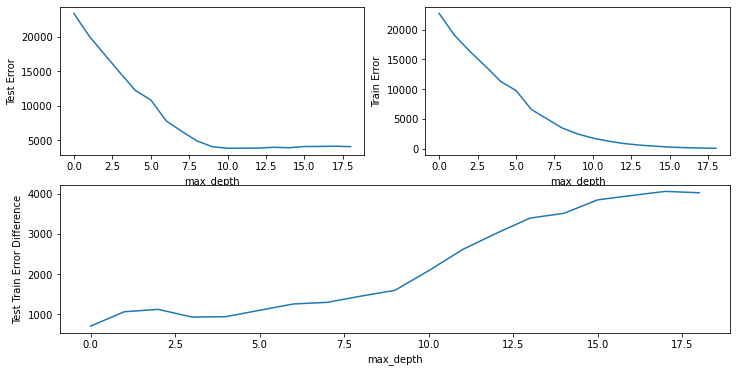

In [53]:
# min_sample_leafs = 1 by default
def max_depth_tuning(min_samples_leaf):
    test_error = []
    train_error = []
    test_train_diff = []
    for i in range(1,20):
        results = decisionTreeRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,min_samples_leaf,i)
        test_error.append(results[0])
        train_error.append(results[1])
        test_train_diff.append(abs(results[0]-results[1]))

    plot_iters('max_depth',test_error,train_error,test_train_diff)
max_depth_tuning(min_samples_leaf=1)

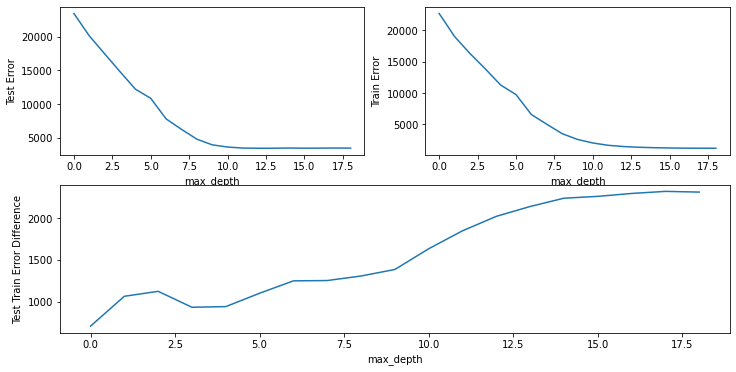

In [54]:
max_depth_tuning(min_samples_leaf=5)

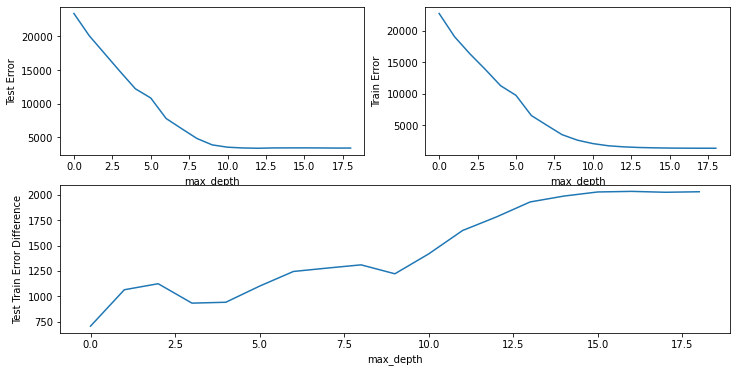

In [55]:
max_depth_tuning(min_samples_leaf=6)

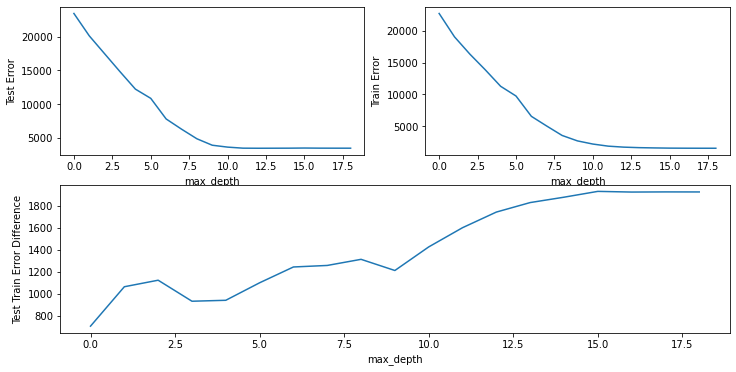

In [56]:
max_depth_tuning(min_samples_leaf=7)

Our <code>max_depth</code>  will range from 6,7,8,9

Our <code>min_samples_leaf</code>  will range from 5,6,7

5 6
Test error 10862.776697483714
Train error 9760.645901561234
Diff 1102.1307959224796
5 7
Test error 7821.5305610209625
Train error 6570.948157402546
Diff 1250.5824036184167
5 8
Test error 6282.141064656079
Train error 5027.065680974455
Diff 1255.0753836816239
5 9
Test error 4828.319662668982
Train error 3520.4261627466626
Diff 1307.8934999223197
6 6
Test error 10862.414683570287
Train error 9760.834624194122
Diff 1101.580059376165
6 7
Test error 7817.164424395128
Train error 6571.724190738594
Diff 1245.4402336565336
6 8
Test error 6319.268152372667
Train error 5043.000574894113
Diff 1276.267577478554
6 9
Test error 4853.664828002895
Train error 3544.2932162827815
Diff 1309.3716117201134
7 6
Test error 10862.114527000336
Train error 9760.834624194122
Diff 1101.2799028062145
7 7
Test error 7817.0739750338125
Train error 6571.901857693265
Diff 1245.1721173405476
7 8
Test error 6307.847527164161
Train error 5049.118574779737
Diff 1258.7289523844238
7 9
Test error 4889.896173108092
Train

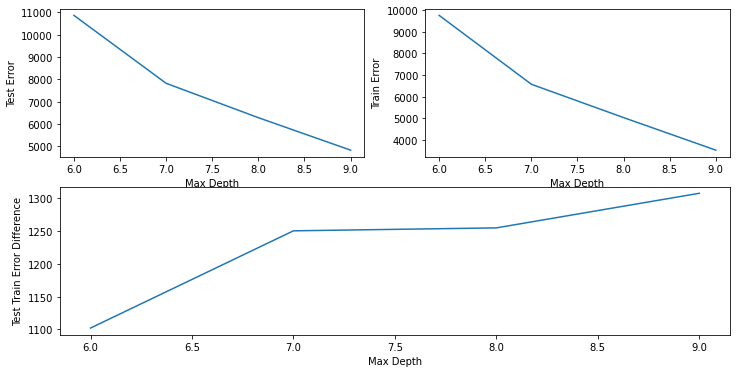

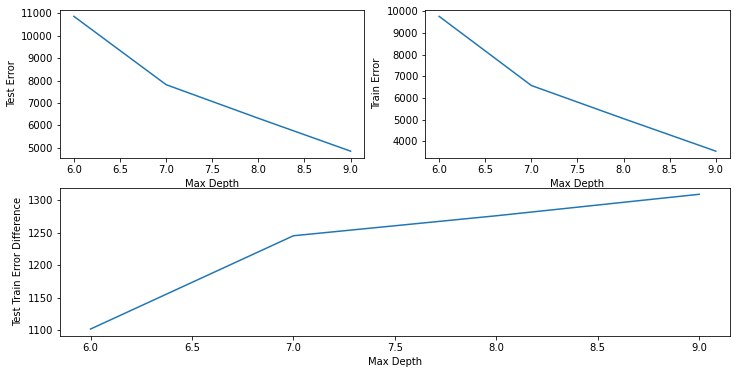

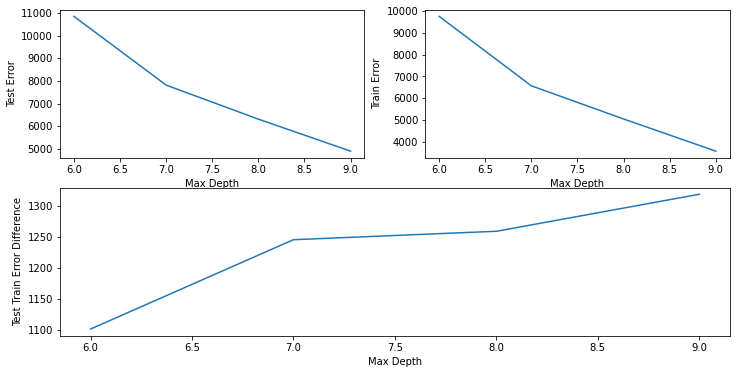

In [57]:
for i in [5,6,7]:
    test_error = []
    train_error = []
    test_train_diff = []
    for j in [6,7,8,9]:
        results = decisionTreeRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,i,j)
        test_error.append(results[0])
        train_error.append(results[1])
        test_train_diff.append(abs(results[0]-results[1]))
        print(i,j)
        print(f'Test error {results[0]}')
        print(f'Train error {results[1]}')
        print(f'Diff {abs(results[0]-results[1])}')
    gs = gridspec.GridSpec(2,2)

    pl.figure(figsize=(12,6))
    pl.title('Max_depth')
    ax = pl.subplot(gs[0,0])
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Test Error')
    pl.plot([6,7,8,9],test_error)

    ax = pl.subplot(gs[0,1])
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Train Error')
    pl.plot([6,7,8,9],train_error)

    ax = pl.subplot(gs[1,:])
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Test Train Error Difference')
    pl.plot([6,7,8,9],test_train_diff)
        

In [58]:
# by examining the results we can say
min_sample_leafs = 5
max_depth = 9

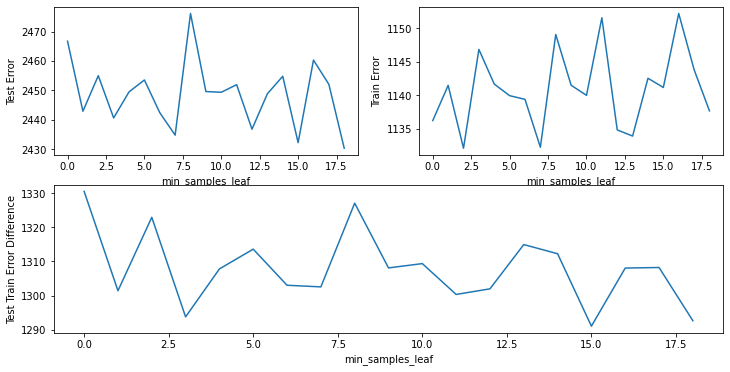

In [59]:
# perform iterations for parameters in random forest to get the best fit model 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = bike_rentals[feature_columns_5]
y = bike_rentals['cnt']

# first with only min leaf then max depth

def randomForestRegressorSolver(data,X_train,X_test,y_train,y_test,min_samples_leafs,max_depth = None):
    #kfold = KFold(n_splits=5,random_state=42,shuffle = True)
    model = RandomForestRegressor(min_samples_leaf=min_sample_leafs,max_depth=max_depth)
    #results = cross_val_score(model,X,y,cv=kfold)
    #return results.mean()
    model.fit(X_train,y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    mse = mean_squared_error
    return mse(y_test,predictions_test),mse(y_train,predictions_train)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
test_error = []
train_error = []
test_train_diff = []
for i in range(1,20):
    results = randomForestRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,i,None)
    test_error.append(results[0])
    train_error.append(results[1])
    test_train_diff.append(abs(results[0]-results[1]))
plot_iters('min_samples_leaf',test_error,train_error,test_train_diff)

min_samples_leafs = [6,7,8]

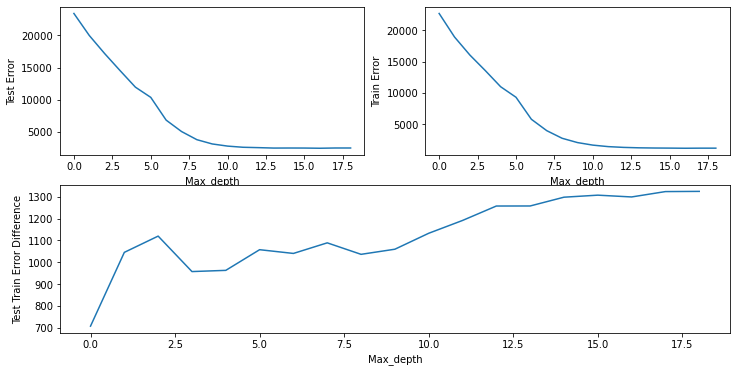

In [60]:
test_error = []
train_error = []
test_train_diff = []
for i in range(1,20):
    results = randomForestRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,1,i)
    test_error.append(results[0])
    train_error.append(results[1])
    test_train_diff.append(abs(results[0]-results[1]))
plot_iters('Max_depth',test_error,train_error,test_train_diff)

In [61]:
for i in [6,7,8,9,10]:
    l1 = []
    l2 = []
    diff = []
    for j in [6,7,8,9,10,11,12]:
        results = randomForestRegressorSolver(bike_rentals,X_train,X_test,y_train,y_test,i,j)
        l1.append(results[0])
        l2.append(results[1])
        diff.append(abs(results[0]-results[1]))
        print(i,j)
        print(f'Test error {results[0]}')
        print(f'Train error {results[1]}')
        print(f'Diff {abs(results[0]-results[1])}')

6 6
Test error 10359.313399622955
Train error 9307.523216694277
Diff 1051.7901829286784
6 7
Test error 6862.252395208377
Train error 5783.848704888081
Diff 1078.403690320296
6 8
Test error 4934.782739638331
Train error 3878.527956448559
Diff 1056.2547831897718
6 9
Test error 3795.6117502565826
Train error 2756.991858771544
Diff 1038.6198914850388
6 10
Test error 3096.589067981744
Train error 2042.0828789500492
Diff 1054.5061890316947
6 11
Test error 2761.428661996849
Train error 1622.0571937249654
Diff 1139.3714682718835
6 12
Test error 2585.2795409739288
Train error 1388.2018557253703
Diff 1197.0776852485585
7 6
Test error 10392.38513169816
Train error 9335.824263190803
Diff 1056.5608685073566
7 7
Test error 6799.470358290611
Train error 5772.751783411896
Diff 1026.7185748787151
7 8
Test error 5029.743374102168
Train error 3952.5094804896235
Diff 1077.2338936125443
7 9
Test error 3775.2688518898067
Train error 2723.8875232731025
Diff 1051.3813286167042
7 10
Test error 3100.64212116898

In [62]:
diff[0]

1053.4869233453064

9,12 seems the most realistic

In [63]:
model = RandomForestRegressor(min_samples_leaf=9,max_depth=12)
    #results = cross_val_score(model,X,y,cv=kfold)
    #return results.mean()
model.fit(X_train,y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
mse = mean_squared_error
mse(y_test,predictions_test),mse(y_train,predictions_train)

(2845.4067189740563, 1797.0497333245205)

In [64]:
X_test

,season,yr,mnth,hr,holiday,weekday,temp,atemp,hum,windspeed,time_label,weathersit_1,weathersit_2,weathersit_3,weathersit_4,workingday_0,workingday_1
5943,3,0,9,4,0,6,0.58,0.5455,0.94,0.0896,4,1,0,0,0,1,0
15739,4,1,10,0,0,2,0.46,0.4545,0.88,0.1642,4,1,0,0,0,0,1
2906,2,0,5,0,0,5,0.44,0.4394,0.44,0.1642,4,1,0,0,0,0,1
12842,3,1,6,7,0,0,0.64,0.6061,0.69,0.1045,1,1,0,0,0,1,0
9053,1,1,1,3,0,3,0.44,0.4394,0.51,0.4925,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,3,1,9,21,0,5,0.64,0.6061,0.73,0.2239,3,1,0,0,0,0,1
13325,3,1,7,10,0,6,0.72,0.6818,0.70,0.0896,1,0,1,0,0,1,0
5606,3,0,8,12,0,5,0.76,0.7273,0.66,0.1045,2,0,1,0,0,0,1
15663,4,1,10,20,0,5,0.52,0.5000,0.77,0.1940,3,1,0,0,0,0,1


In [65]:
mse(y_test,predictions_test)**0.5,mse(y_train,predictions_train)**0.5

(53.34235389419983, 42.39162338628376)

In [66]:
model = DecisionTreeRegressor(min_samples_leaf=5,max_depth=9)
    #results = cross_val_score(model,X,y,cv=kfold)
    #return results.mean()
model.fit(X_train,y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
mse = mean_squared_error
mse(y_test,predictions_test),mse(y_train,predictions_train),mse(y_test,predictions_test)**0.5,mse(y_train,predictions_train)**0.5

(4828.808289913071, 3520.428492615725, 69.48962721092315, 59.333198907658144)

In [67]:
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train,y_train)
r2_score(model.predict(X_test),y_test)

-0.15602619169380194

This implies a non linear dataset and hence we will use non linear algorithms such as Random Forest and Decision Trees.

In [68]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
parameters={'bootstrap': [True, False],
 'max_depth': [5,7,8,10,12],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [7,8,9],
 'min_samples_split': [2, 5, 10]}


grid = GridSearchCV(estimator = model,param_grid = parameters,cv = 3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 7, 8, 10, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [2, 5, 10]})

In [69]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 5}

In [72]:
model = RandomForestRegressor(bootstrap = True,
 max_depth = 12,
 max_features = 'auto',
 min_samples_leaf = 7,
 min_samples_split = 5)
    #results = cross_val_score(model,X,y,cv=kfold)
    #return results.mean()
model.fit(X_train,y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)
mse = mean_squared_error
mse(y_test,predictions_test),mse(y_train,predictions_train)

(2722.51172629178, 1613.1326440293785)

In [73]:
mse(y_test,predictions_test)**0.5,mse(y_train,predictions_train)**0.5

(52.17769376171948, 40.16382257740638)

Better than manually selecting the best parameters, we can use Grid Search. But the downside of using grid search is the time taken to execute it. While manually testing the parameters, we tested about 20 values for each parameters and still took less computation time than Grid Search did for considersably lesser parameter values. Also, the question at hand does not need us to be highly accurate and grid search did not decrease the error by a huge margin. So for the current question statement I would have definitively chosen manual opitimisation. This approach will take time to code the functions properly but hands us the advantage to check many parameters in reasonable time.

In [74]:
feature_columns_5

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'workingday_0',
 'workingday_1']

In [71]:
input = [1,1,2,0,2,0.18,0.18,0.64,4,3,0,0,0,1,0,1,1]

In [72]:
model.predict([input])

/Users/saumyamundra/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([49.68426227])

In [74]:
X_train.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'temp', 'atemp',
       'hum', 'windspeed', 'time_label', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'workingday_0', 'workingday_1'],
      dtype='object')

In [88]:
import pickle

model_file = open('model.pkl','wb')

pickle.dump(model,model_file)
model_file.close()

In [84]:
dbfile = open('model', 'rb')     
db = pickle.load(dbfile)
db

RandomForestRegressor(max_depth=12, min_samples_leaf=7, min_samples_split=5)